<h1><center>EARLY STAGE DIABETES PREDICTION</center></h1>

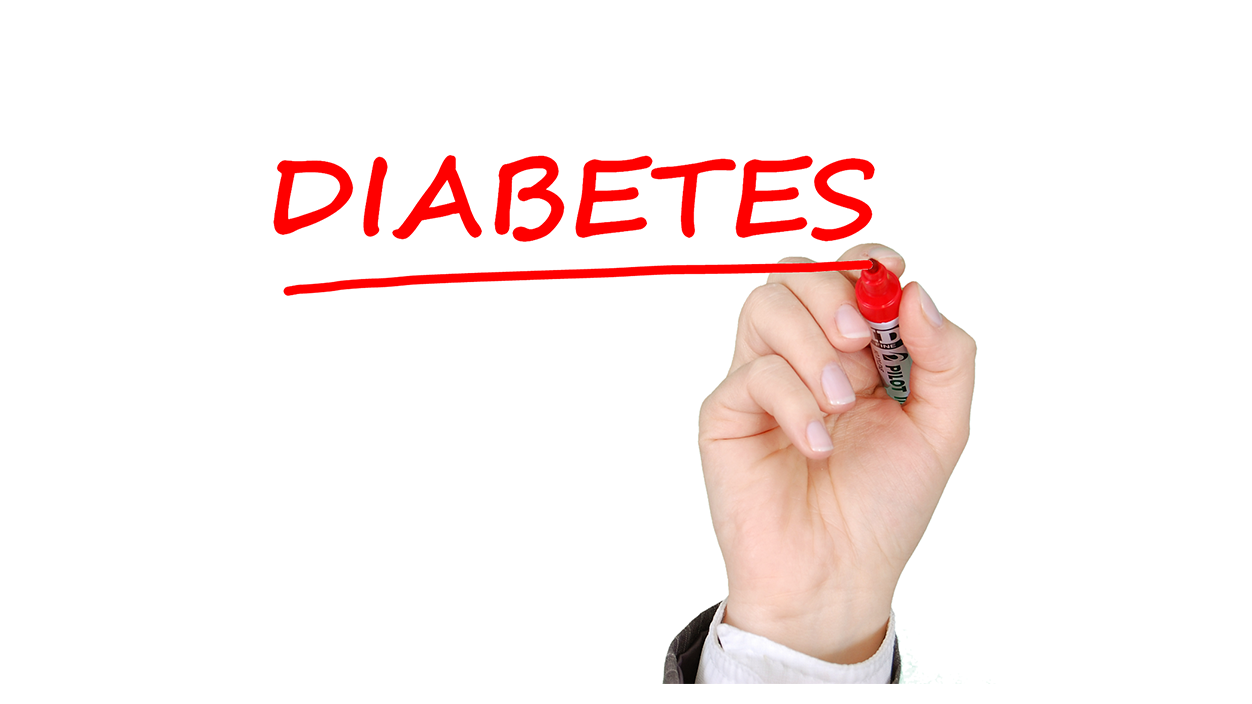

## EXECUTIVE SUMMARY

The aim of this project is to create machine learning and deep learning models to predict if someone have early stage diabetes.
The diabetes dataset was downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.), where the file was renamed from "diabetes_data_upload.csv" to "diabetes_data.csv", and the column titles were converted to title case for consistency. The CSV file was then loaded into a Pandas DataFrame. Since the dataset did not contain any missing values and was already in a presentable format, data preprocessing was not required.

Exploratory Data Analysis (EDA) was performed to discover insights about the data. Some visualizations were generated from the data, and the relationship between different characteristics were compared.

Insights discovered from the data were:

* 320 participants have diabetes, whereas 200 participants do not have diabetes.
* Out of the 320 participants with diabetes, about 150 are males and 170 are females. It is possible that some of the females with diabetes could have developed it from Gestational Diabetes (GDM).
* The ages of participants with and without diabetes are around the same range. However, there are some elderly people (> 75 years) and young people (< 20 years) with diabetes. Therefore, the relationship between age and diabetes cannot be distinguished.


The features (X) selected for the models were:
* Age
* Gender
* Polyuria 
* Polydipsia
* Sudden Weight Loss
* Weakness
* Polyphagia
* Genital Thrush
* Visual Blurring
* Itching
* Irritability
* Delayed Healing
* Partial Paresis
* Muscle Stiffness
* Alopecia
* Obesity

For the models, a K-Nearest Neighbor (KNN) model (with and without hyperparameter tuning) and a simple Deep Learning model were selected.

Since these models do not allow categorical values, the categorical features were converted to numerical values using the "One Hot Encoding" technique. The data was then standardized using a StandardScaler object, and split into training and testings sets. A KNN model (without hyperparameter tuning) was created first, followed by a KNN model (with hyperparameter tuning) using a GridSearchCV object, and then a Deep Learning model was created.  

The accuracies of the models were then calculated, where it was determined that the KNN model (with hyperparameter tuning) was the most accurate, having an accuracy of 100 %, followed by the Deep Learning model and the KNN model (without hyperparameter tuning).

## TABLE OF CONTENTS
* [INTRODUCTION](#introduction)
* [METHODOLOGY](#methodology)
    * [INSTALLING AND IMPORTING LIBRARIES](#installing_importing_libraries)
    * [DATA COLLECTION](#data_collection)
    * [DATA PREPROCESSING](#data_preprocessing)
    * [EXPLORATORY  DATA  ANALYSIS](#exploratory_data_analysis)
    * [PREDICTIVE ANALYSIS](#predictive_analysis)
* [DISCUSSION](#discussion)
* [CONCLUSION](#conclusion)
* [REFERENCES](#references)
* [APPENDIX](#appendix)

## INTRODUCTION <a class="anchor" id="introduction"></a>

Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin that it produces. Insulin is a hormone that regulates the blood sugar level in the body. Hyperglycaemia (elevated blood sugar) is a common effect of uncontrolled diabetes which, as time progresses, can cause serious damage of many of the body's systems, especially the nerves and blood vessels.[[1]](#1) 

There are 3 main types of diabetes [[2]](#2) :

* Type 1 - The body produces very little or no insulin, thereby daily insulin injections would be required to maintain blood sugar levels. This type of diabetes can occur at any age, but it occurs mostly in children and teenagers.


* Type 2 - The body does not effectively utilize the insulin that it produces. This kind of diabetes can be treated by having a healthy lifestyle, including regular exercise and a healthy diet. However, as time progresses, most people with this type of diabetes would require oral drugs and/or insulin to maintain blood sugar levels. This type of diabetes is more common in adults, and accounts for around 90% of all diabetes cases.


* Gestational Diabetes (GDM) - During pregnancy, the blood sugar levels may reach very high levels, and is associated with complications to both mother and child. GDM usually disappears after pregnancy but women affected, and their child, are at an increased risk of developing type 2 diabetes in the future.

**Problem Statement: To create machine learning and deep learning models to predict early stage diabetes. These models can then be used in the healthcare industry to detect if someone could have early stage diabetes, which can then be verified by medical tests.**

## METHODOLOGY <a class="anchor" id="methodology"></a>

1. [Installing and importing libraries](#installing_importing_libraries) - The required libraries were installed and imported.
2. [Data Collection](#data_collection) - The diabetes dataset was downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.). The file was renamed from "diabetes_data_upload.csv" to "diabetes_data.csv", and the column titles were converted to title case for consistency. The dataset was then loaded into a Pandas DataFrame.
3. [Data Preprocessing](#data_preprocessing) - Since the dataset did not contain any missing values and is already in a presentable format, data preprocessing was not required.
4. [Exploratory Data Analysis](#exploratory_data_analysis) - Exploratory Data Analysis (EDA) was performed to discover insights about the data.
5. [Predicive Analysis](#predictive_analysis) - A K-Nearest Neighbor (KNN) model (with and without hyperparameter tuning) and a simple Deep Learning model was created, where the accuracy of each model was calculated and compared.

### INSTALLING AND IMPORTING LIBRARIES <a class="anchor" id="installing_importing_libraries"></a>

**The required libraries were installed.**

The command to install packages/libraries are: **!pip install [library]** 

The following libraries were installed: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn and Keras.

In [27]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install keras

**The required libraries were imported.**

For this project, the only external libraries that were required were: NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn and Keras. Some standard libraries were also imported.

In [28]:
import os # For interacting with the operating system e.g. checking if a file exists.
import sys # For terminating the program.

import numpy as np # Library for utlizing high performance arrays.
import pandas as pd # Library for data cleaning, manipulation and analysis.
import matplotlib.pyplot as plt # Library for data visualization.
import seaborn as sns # Library for data visualization.

from sklearn.preprocessing import StandardScaler # For data standardization.
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets.
from sklearn.model_selection import GridSearchCV # For determining the best hyperparameters of classification models.
from sklearn.metrics import accuracy_score # For determining the accuracy of the model.

# K-Nearest Neighbor (KNN) Model.
from sklearn.neighbors import KNeighborsClassifier

# For creating a Deep Learning model.
from keras.models import Sequential # For creating a sequential (layered) deep learning model.
from keras.layers import Dense # For creating a dense layer to be added to the model.

### DATA COLLECTION <a class="anchor" id="data_collection"></a>

The diabetes dataset was downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.). It contains several feature columns and one target column called "Class", which states if the person has diabetes or not (either "Positive" or "Negative").

The dataset was renamed from "diabetes_data_upload.csv" to "diabetes_data.csv". Also, the titles of the columns were converted to title case for consistency.

Since the dataset is a CSV (Comma Separated Value) file, it was loaded into a Pandas DataFrame using the read_csv() function.

In [29]:
filename = 'diabetes_data.csv' # File Path.

if os.path.exists(filename): # Checks if the file exists.
    if filename.endswith('.csv'): # Checks if the file is a CSV file.
        df = pd.read_csv(filename) # Loads the CSV file into a Pandas DataFrame.
    else:
        print(f'{filename} is not a CSV file') # Displays a message that the file is not a CSV file.
        print('Program terminated...\n') # Displays a message that the program is terminated.
        sys.exit() # Terminates the program.
else:
    print(f'{filename} does not exist.') # Displays a message that the file does not exist.
    print('Program terminated...\n') # Displays a message that the program is terminated.
    sys.exit() # Terminates the program.

The first 5 rows of the "df" DataFrame is displayed.

In [30]:
df.head() # Displays the first 5 rows of the "df" DataFrame.

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


The last 5 rows of the "df" DataFrame is displayed.

In [31]:
df.tail() # Displays the last 5 rows of the "df" DataFrame.

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In the "df" DataFrame, there are 521 rows (including the header) and 17 columns. **None** of the columns contain missing values.

In [32]:
 df.info() # Displays general information about the "df" DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paresis     520 non-null    object
 13  Muscle Stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

Statistical information about the "df" DataFrame is displayed.

In [33]:
df.describe(include='all') # Displays statistical information about all the columns in the "df" DataFrame.

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DATA PREPROCESSING <a class="anchor" id="data_preprocessing"></a>

Data preprocessing is the process of **transforming** data into an understandable format for analysis, visualization and modelling.

Data preprocessing invloves the following steps:
* Data Cleaning -
    1. Handling missing values in rows and/or columns (either by removing or replacing them).
    2. Removing duplicate rows.
    4. Dealing with values that are not within the expected range.
    3. Dealing with data in the wrong format (such as an incorrect date format).
    
    
* Data Wrangling - Organizing and restructuring the dataset(s) into a desired format.

Since this dataset does **not** contain any missing values and is already in a presentable format, data preprocessing is not required.

**The preprocessed data can then be saved to a file for future use (optional).**

In [34]:
# df.to_csv('diabetes_data_cleaned.csv') # Save the "df" DataFrame to a CSV file in the speicified path.

### EXPLORATORY DATA ANALYSIS <a class="anchor" id="exploratory_data_analysis"></a>

Exploratory Data Analysis (EDA) is the process of analyzing data using visualizations to discover trends, patterns or check if assumptions are correct.

**What is the age range of the participants?**

In [35]:
min_age = df['Age'].min() # Returns the minimum value of the "Age" column in the "df" DataFrame.
max_age = df['Age'].max() # Returns the maximum value of the "Age" column in the "df" DataFrame.
median_age = df['Age'].median() # Returns the median value of the "Age" column in the "df" DataFrame.

print(f'The age range of the participants is {min_age} to {max_age} years.') # Displays the age range of the participants.
print(f'The median age of the participants is {median_age} years.') # Displays the median age of the participants.

The age range of the participants is 16 to 90 years.
The median age of the participants is 47.5 years.


**What is the age distribution of the participants?**

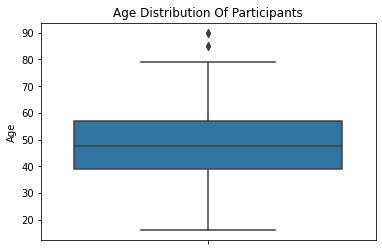

In [36]:
sns.boxplot(y="Age", data=df) # Geneates a vertical box plot of the ages.
plt.ylabel('Age') # y-axis label.
plt.title('Age Distribution Of Participants') # Title of plot.
plt.show() # Displays the plot.

Most of the participiants are between 16-80 years with a median age of 47.5 years. There are a few participants above 80 years.

**How many participants have diabetes?**

In [37]:
df['Class'].value_counts() # Display the number of participants with diabetes.

Positive    320
Negative    200
Name: Class, dtype: int64

320 participants have diabetes, whereas 200 participants do not have diabetes. 

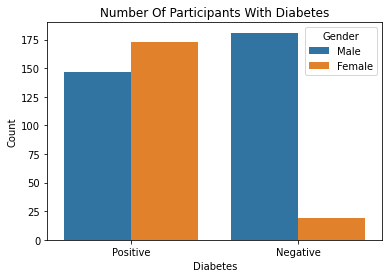

In [38]:
sns.countplot(x='Class', hue='Gender', data=df) # Generates a bar graph of the number of participants with diobetes (by Gender).
plt.xlabel('Diabetes') # x-axis label.
plt.ylabel('Count') # y-axis label.
plt.title('Number Of Participants With Diabetes') # Title of plot.
plt.show() # Displays the plot.

Out of the 320 participants with diabetes, about 150 are males and 170 are females. It is possible that some of the females with diabetes could have developed it from Gestational Diabetes (GDM).

**What is the age distribution of participants with diabetes?**

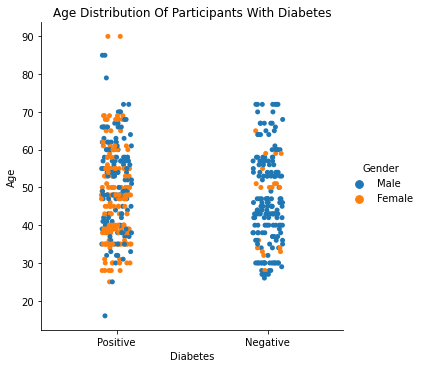

In [39]:
# Generates a categorical scatter plot of the number of people with diobetes (by Gender).
sns.catplot(x='Class', y='Age', hue='Gender', data=df) 
plt.xlabel('Diabetes') # x-axis label.
plt.ylabel('Age') # y-axis label.
plt.title('Age Distribution Of Participants With Diabetes') # Title of plot.
plt.show() # Displays the plot.

The ages of participants with and without diabetes are around the same range. However, there are some elderly people (> 75 years) and young people (< 20 years) with diabetes. Therefore, the relationship between age and diabetes cannot be distinguished.

**Other feature distributions**

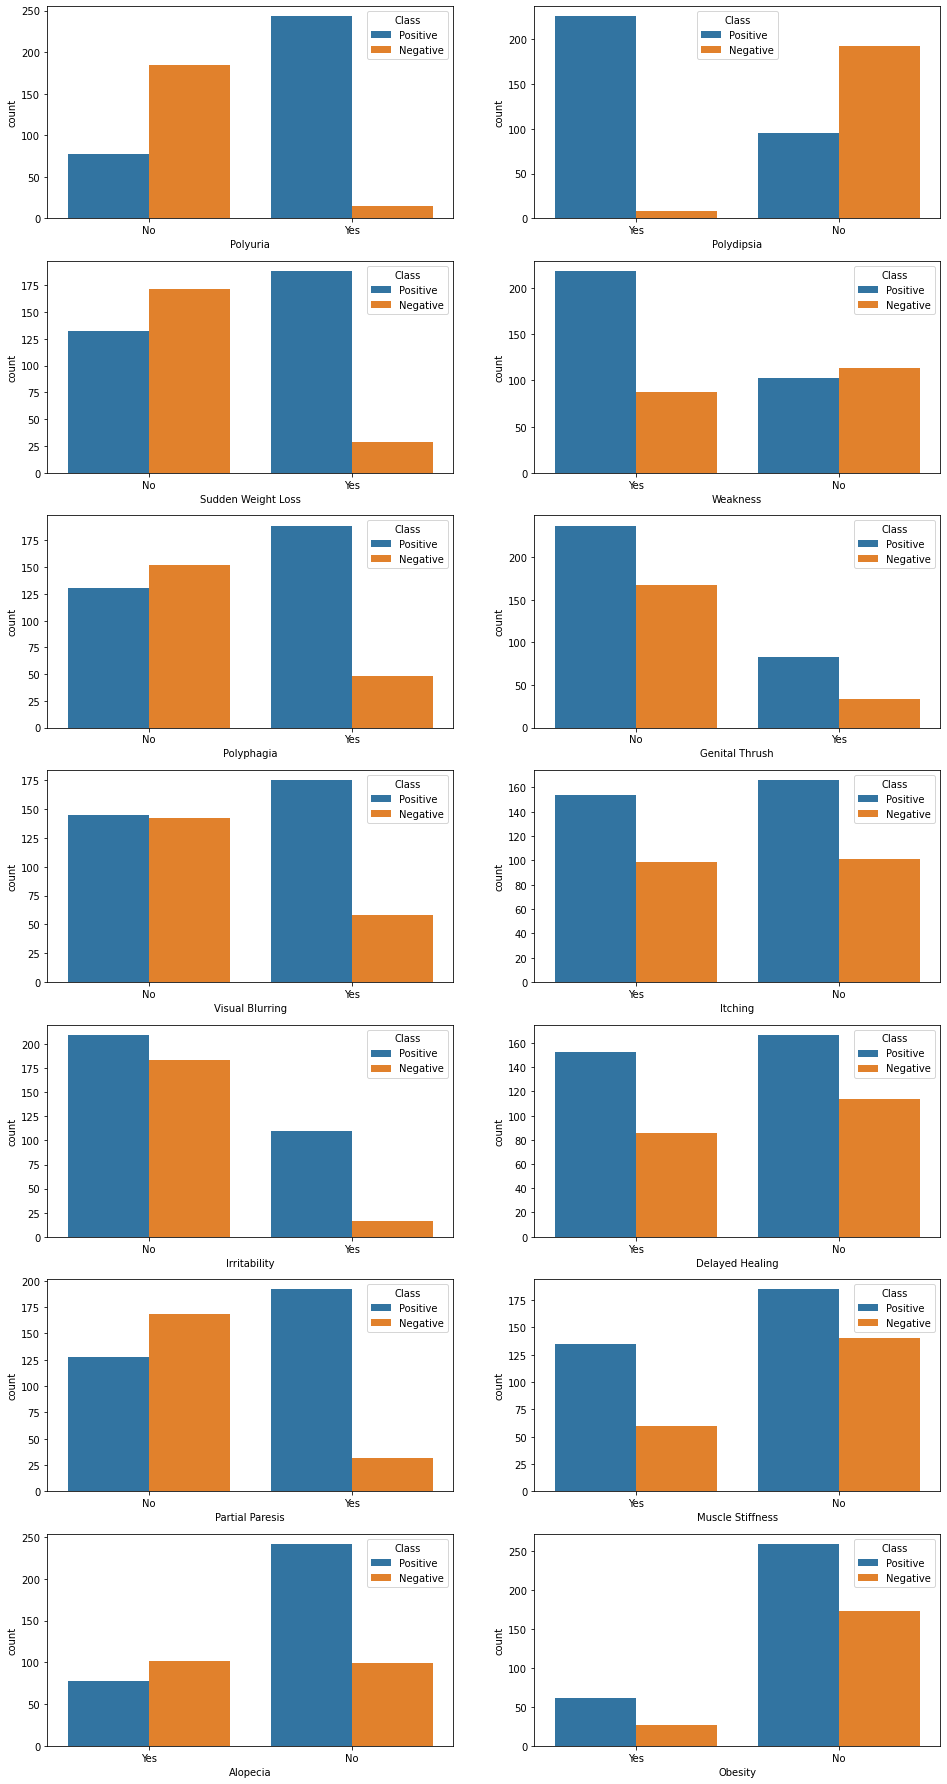

In [40]:
# Creates a plot area for 7 vertical plots and 2 horizontal plots. Sets the size of the plot.
fig, axes = plt.subplots(7, 2, figsize=(16, 32))

# Generates a bar graph of the number of people with Polyurea (by Class).
sns.countplot(ax=axes[0, 0], x='Polyuria', hue='Class', data=df)

# Generates a bar graph of the number of people with Polydipsia (by Class).
sns.countplot(ax=axes[0, 1], x='Polydipsia', hue='Class', data=df)

# Generates a bar graph of the number of people with Sudden Weight Loss (by Class).
sns.countplot(ax=axes[1, 0], x='Sudden Weight Loss', hue='Class', data=df)

# Generates a bar graph of the number of people with Weakness (by Class).
sns.countplot(ax=axes[1, 1], x='Weakness', hue='Class', data=df)

# Generates a bar graph of the number of people with Polyphagia (by Class).
sns.countplot(ax=axes[2, 0], x='Polyphagia', hue='Class', data=df)

# Generates a bar graph of the number of people with Genital Thrush (by Class).
sns.countplot(ax=axes[2, 1], x='Genital Thrush', hue='Class', data=df)

# Generates a bar graph of the number of people with Visual Blurring (by Class).
sns.countplot(ax=axes[3, 0], x='Visual Blurring', hue='Class', data=df)

# Generates a bar graph of the number of people with Itching (by Class).
sns.countplot(ax=axes[3, 1], x='Itching', hue='Class', data=df)

# Generates a bar graph of the number of people with Irritability (by Class).
sns.countplot(ax=axes[4, 0], x='Irritability', hue='Class', data=df)

# Generates a bar graph of the number of people with Delayed Healing (by Class).
sns.countplot(ax=axes[4, 1], x='Delayed Healing', hue='Class', data=df)

# Generates a bar graph of the number of people with Partial Paresis (by Class).
sns.countplot(ax=axes[5, 0], x='Partial Paresis', hue='Class', data=df)

# Generates a bar graph of the number of people with Muscle Stiffness (by Class).
sns.countplot(ax=axes[5, 1], x='Muscle Stiffness', hue='Class', data=df)

# Generates a bar graph of the number of people with Alopecia (by Class).
sns.countplot(ax=axes[6, 0], x='Alopecia', hue='Class', data=df)

# Generates a bar graph of the number of people with Obesity (by Class).
sns.countplot(ax=axes[6, 1], x='Obesity', hue='Class', data=df)

plt.show() # Displays the plot.

Bar Graphs of the other features (with Class) such as Polyurea, Polydipsia, Sudden Weight Loss etc.  were generated.

### PREDICTIVE ANALYSIS <a class="anchor" id="predictive_analysis">

**The categorical values in the target (y) column were converted into numerical values.**

The target column (Class) would need to be converted from categorical (string) values into numerical (integer) values since the models can only work with numerical values. "Negative" would be represented by 0, whereas "Positive" would be represented by 1.

In [41]:
df['Class'].unique() # Displays the unique values present in the "Class" column of the "df" DataFrame.

array(['Positive', 'Negative'], dtype=object)

In [42]:
outcomes = [] # List to store the numerical Class values.

for outcome in df['Class']: # Loops through each value in the "Class" column of the "df" DataFrame.
    if outcome == 'Negative': # Checks if the current value is "Negative".
        outcomes.append(0) # Appends a 0 to the outcomes list.
    elif outcome == 'Positive': # Checks if the current value is "Positive".
        outcomes.append(1) # Appends a 1 to the outcomes list.

In [43]:
df['Class'] = outcomes # Reassigns the values in the "Class" column of the "df" DataFrame to the numerical Class values.

**The features (X) and target (y) were selected from the dataset.**

Before performing predictive analysis on the data, the features (predictor variables) and the target needs to be selected from the dataset. The features (X) are used to predict the target (y). Since these models only allow numerical values, categorical columns (columns containing non numerical values) will need to be converted into numerical columns using the "One Hot Encoding" technique. 

In [44]:
# Extracts relevant columns from the "df" DataFrame, which is to be used as the features.
features = df[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness', 'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity']]

# Converts categorical columns into numerical columns using the "One Hot Encoding" technique, and store the resulting DataFrame in X.
X = pd.get_dummies(features, prefix=['Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness', 'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity'])

y = df['Class'] # Extracts the "Class" column from the DataFrame, which is to be used as the target.

**The features were standardized so that the values would range between 0 and 1.**

In [45]:
scaler = StandardScaler() # Creates a StandardScaler object for data standardization.
X = scaler.fit_transform(X) # Fits the features to the StandardScaler object, and returns the scaled data.

**The data was split into a training and testing set.**

In [46]:
# Split the data into training and testing sets with a test size of 20%, and a random state of 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**A dictionary is created to store the accuracy of the models.**

In [47]:
model_accuracies = {} # Dictionary to store the accuracy of the models.

**A K-Nearest Neighbor model (with and without hyperparameter tuning) and a simple Deep Learning model was created. The accuracies of the models were then calculated.**

A KNN model (without hyperparameter tuning) was created, and then evaluated using the accuracy_score() method in the Scikit-Learn library.

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=3) # Creates a KNN model with 3 neighbors.
knn_model.fit(X_train, y_train) # Fits the KNN model to the training data.

y_predict = knn_model.predict(X_test) # Predicts the target using the test data.
knn_accuracy = accuracy_score(y_test, y_predict) # Calculates the accuracy using the actual and predicted values.

model_accuracies['KNN (without hyperparameter tuning)'] = knn_accuracy # Stores the accuracy of the KNN model in the "model_accuracies" dictionary.

A KNN model (with hyperparameter tuning) was created using GridSearchCV to determine the best hyperparameters, and then evaluated using the accuracy_score() method in the Scikit-Learn library.

In [49]:
# KNN Parameters for determining best hyperparameters.
parameters = {'n_neighbors': list(range(1, 11)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1,2]}

knn_model = KNeighborsClassifier() # Creates a KNN model.

# Creates a GridSearchCV object using the KNN model and its parameters, with 10 cross validations.
knn_cv = GridSearchCV(knn_model, parameters, scoring='accuracy', cv=10)

knn_cv.fit(X_train, y_train) # Fits the GridSearchCV object using the training data.

knn_cv_best_hyperparameters = knn_cv.best_params_ # Obtains the best hyperparameters of the KNN model.
# Displays a statement about the best hyparameters of the KNN model.
print(f'Best Hyperparameters for KNN model: {knn_cv_best_hyperparameters}') 

y_predict = knn_cv.predict(X_test) # Predicts the target using the test data.
knn_accuracy = accuracy_score(y_test, y_predict) # Calculates the accuracy using the actual and predicted values.

# Stores the accuracy of the cross-valiated KNN model in the "model_accuracies" dictionary.
model_accuracies['KNN (with hyperparameter tuning)'] = knn_accuracy 

Best Hyperparameters for KNN model: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}


A simple Deep Learning model was created using Keras, and then evaluated using the evaluate() method.

In [50]:
deep_learning_model = Sequential() # Creates a Sequential (layered) Deep Learning model.

deep_learning_model.add(Dense(12, input_dim=31, activation="relu")) # Creates a Dense input layer, and adds it to the model.
deep_learning_model.add(Dense(8, activation="relu")) # Creates a Dense hidden layer, and adds it the model.
deep_learning_model.add(Dense(1, activation="sigmoid")) # Creates a Dense output layer, and adds it to the model.

deep_learning_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compiles the model before training.

# Fits the model to the training data with 100 epochs and a batch size of 10.
deep_learning_model.fit(X_train, y_train, epochs=100, batch_size=10) 

# Calculates the accuracy using the actual and predicted values.
deep_learning_model_accuracy = deep_learning_model.evaluate(X_test, y_test) 

# Stores the accuracy of the deep learning model in the "model_accuracies" dictionary.
model_accuracies['Deep Learning Model'] = deep_learning_model_accuracy[1] 

Epoch 1/100
42/42 [==============================] - 0s 556us/step - loss: 0.6014 - accuracy: 0.7139
Epoch 2/100
42/42 [==============================] - 0s 927us/step - loss: 0.4527 - accuracy: 0.8173
Epoch 3/100
42/42 [==============================] - 0s 854us/step - loss: 0.3668 - accuracy: 0.8774
Epoch 4/100
42/42 [==============================] - 0s 878us/step - loss: 0.3053 - accuracy: 0.9087
Epoch 5/100
42/42 [==============================] - 0s 912us/step - loss: 0.2592 - accuracy: 0.9303
Epoch 6/100
42/42 [==============================] - 0s 878us/step - loss: 0.2230 - accuracy: 0.9351
Epoch 7/100
42/42 [==============================] - 0s 976us/step - loss: 0.1954 - accuracy: 0.9399
Epoch 8/100
42/42 [==============================] - 0s 829us/step - loss: 0.1730 - accuracy: 0.9447
Epoch 9/100
42/42 [==============================] - 0s 870us/step - loss: 0.1557 - accuracy: 0.9495
Epoch 10/100
42/42 [==============================] - 0s 951us/step - loss: 0.1410 - accura

42/42 [==============================] - 0s 878us/step - loss: 0.0145 - accuracy: 0.9928
Epoch 82/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9880
Epoch 83/100
42/42 [==============================] - 0s 902us/step - loss: 0.0142 - accuracy: 0.9928
Epoch 84/100
42/42 [==============================] - 0s 805us/step - loss: 0.0149 - accuracy: 0.9880
Epoch 85/100
42/42 [==============================] - 0s 829us/step - loss: 0.0163 - accuracy: 0.9904
Epoch 86/100
42/42 [==============================] - 0s 829us/step - loss: 0.0132 - accuracy: 0.9952
Epoch 87/100
42/42 [==============================] - 0s 878us/step - loss: 0.0137 - accuracy: 0.9928
Epoch 88/100
42/42 [==============================] - 0s 878us/step - loss: 0.0149 - accuracy: 0.9928
Epoch 89/100
42/42 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 0.9928
Epoch 90/100
42/42 [==============================] - 0s 878us/step - loss: 0.0131 - accuracy: 0.99

In [51]:
for model, accuracy in model_accuracies.items(): # Loops through the model and its accuracy, in the "model_accuracies" dictionary.
    print(f'{model} Accuracy: {accuracy}') # Displays a statement about the model and it's accuracy.

KNN (without hyperparameter tuning) Accuracy: 0.9615384615384616
KNN (with hyperparameter tuning) Accuracy: 1.0
Deep Learning Model Accuracy: 0.9807692170143127


**A bar graph of the model accuracies was generated.**

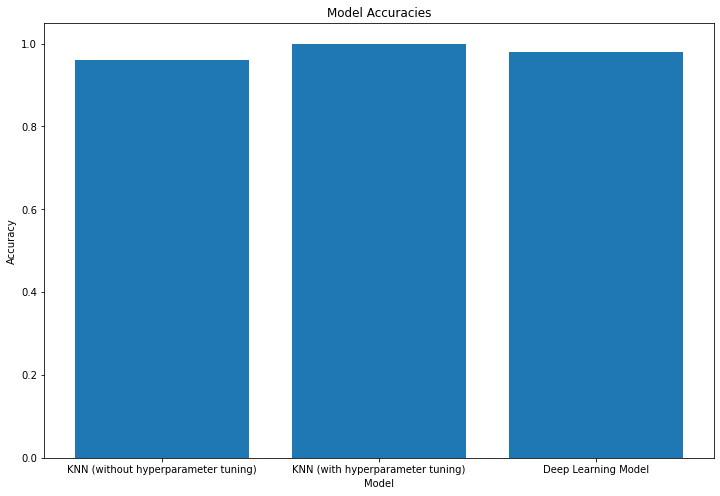

In [52]:
models = model_accuracies.keys() # Obtains an iterable containing the keys in  the "model_accuracies" dictionary.
accuracies = model_accuracies.values() # Obtains an iterable containing the values in the "model_accuracies" dictionary.

fig, ax = plt.subplots(figsize=(12, 8)) # Sets the size of the plot.

plt.bar(x=models, height=accuracies) # Generate a bar chart of the model accuracies.
plt.title('Model Accuracies') # Title of plot.
plt.xlabel('Model') # x-axis label.
plt.ylabel('Accuracy') # y-axis label.
plt.show() # Display the plot.

All of the models performed well and had an accuracy above 95%. The KNN model (with hyperparamater tuning) is the most accurate model, followed by the Deep Learning model and then the the KNN model.

## DISCUSSION <a class="anchor" id="discussion">

A K-Nearest Neighbor (KNN) model (with and without hyperparameter tuning) and a simple Deep Learning model was created.The accuracy of each model was then calculated and compared. The Scikit-Learn and Keras libraries were used for creating the models, since these libraries are very popular and easy to implement.

KNN was chosen for this project since it is one of the most popular classification models, and has a lot of different applications.

The KNN model (with hyperparameter tunining) was the most accurate model, having an accuracy of 100 %. The KNN model (without hyperparamter tuning) and the simple Deep Learning model had the same accuracy of 96.15 %. In this project, the KNN model (with hyperparameter tuning) had the highest accuracy, but this may not always be the case, since the data would most likely be different for another project.



**Precautions:**
* The dataset was downloaded from a more credible source than other websites e.g. Kaggle.

**Limitations:**
* The dataset is small (only containing 520 rows), which may be insufficient for creating a model for production.
* Some of the columns in the dataset (e.g. Obesity) should have used continious values instead of categorical values, which can allow the model to make better predictions.

## CONCLUSION <a class="anchor" id="conclusion">

Insights discovered from the data were:

* 320 participants have diabetes, whereas 200 participants do not have diabetes.
* Out of the 320 participants with diabetes, about 150 are males and 170 are females. It is possible that some of the females with diabetes could have developed it from Gestational Diabetes (GDM).
* The ages of participants with and without diabetes are around the same range. However, there are some elderly people (> 75 years) and young people (< 20 years) with diabetes. Therefore, the relationship between age and diabetes cannot be distinguished.


The features (X) selected for the models were:
* Age
* Gender
* Polyuria 
* Polydipsia
* Sudden Weight Loss
* Weakness
* Polyphagia
* Genital Thrush
* Visual Blurring
* Itching
* Irritability
* Delayed Healing
* Partial Paresis
* Muscle Stiffness
* Alopecia
* Obesity


Out of the three models created, the KNN model (with hyperparameter tuning) was the most accurate, having an accuracy of 100 %.

## REFERENCES<a class="anchor" id="references">

[1] <a class="anchor" id="1"></a> https://www.who.int/news-room/fact-sheets/detail/diabetes

[2] <a class="anchor" id="2"></a> https://www.idf.org/aboutdiabetes/what-is-diabetes.html

## APPENDIX<a class="anchor" id="appendix">

* [Applied AI with DeepLearning (Coursera)](https://www.coursera.org/learn/ai?specialization=advanced-data-science-ibm)
* [Develop your first Deep Learning Model in Python with Keras](https://www.analyticsvidhya.com/blog/2021/05/develop-your-first-deep-learning-model-in-python-with-keras/)